# Preprocessing first version created by Surnjani Djoko (April 4, 2022)

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import os

#project_path = '/content/drive/My Drive/fourthbrain/Capstone project/'
project_path = ""
project_dir = os.path.join(project_path, 'data_set1.csv')
project_dir

'data_set1.csv'

In [25]:
df = pd.read_csv(project_dir)
df.shape, display(df.sample(3))

,Unnamed: 0,Unnamed: 0.1,date,year,month,day,title,article,publication
2013874,2036204,2036204,2017-04-08 10:47:40,2017,4.000,8,South Carolina Inmates Charged in Killings of ...,Two South Carolina prison inmates serving life...,The New York Times
1836694,1855586,1855586,2019-08-07 00:00:00,2019,8.000,7,Krystal Ball EXCLUSIVE: New Yang numbers show ...,Saagar Enjeti discusses Castro's doxing twe...,The Hill
1542334,1559059,1559059,2018-08-15,2018,8.000,15,At least 35 people killed in Genoa bridge coll...,At least 35 people were killed when a bridge c...,CNBC


((2584149, 9), None)

In [27]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [37]:
year_list = list(df.year.unique())
year_list

[2016, 2018, 2019, 2017, 2020]

In [46]:
def train_test_split(df, frac=0.2):
    train_frames=[]
    test_frames=[]
    train_result = pd.DataFrame()
    test_result = pd.DataFrame()
    for year in year_list:
        test = df[df.year == year].sample(frac=frac, axis=0)
        train = df[df.year == year].drop(index=test.index)
        train_frames = [train_result, train]
        test_frames = [test_result, test]
        train_result = pd.concat(train_frames, axis=0)
        test_result = pd.concat(test_frames, axis=0)
    return train_result, test_result

In [47]:
df_train, df_test = train_test_split(df)
df_train.shape, df_test.shape

((2067318, 7), (516831, 7))

In [48]:
df_train.year.unique(), df_test.year.unique()

(array([2016, 2018, 2019, 2017, 2020]), array([2016, 2018, 2019, 2017, 2020]))

In [49]:
df_train.sample(3)

,date,year,month,day,title,article,publication
2093116,2018-09-13 02:00:23,2018,9.000,13,"Training Eyes on the Smallest Details, Soccer ...","On Soccer MANCHESTER, England — Over the years...",The New York Times
1720573,2016-04-19,2016,4.000,19,Clinton wins Hispanic votes in NY exit polls |...,Democratic front-runner Hillary ClintonHillary...,The Hill
2246700,2019-10-23 00:00:00,2019,10.000,23,Trump to promote withdrawing U.S. from Paris c...,"WASHINGTON, Oct 23 (Reuters) - President Donal...",Reuters


In [50]:
df_train.to_csv('data_set1_train.csv', index=False)
df_test.to_csv('data_set1_test.csv', index=False)

In [19]:
df_train = pd.read_csv('data_set1_train.csv')
df_train.shape, display(df_train.head(3))

,date,year,month,day,title,article,publication
0,2016-10-07 21:26:46,2016,10.000,7,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider
1,2016-01-27 00:00:00,2016,1.000,27,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,TMZ
2,2016-05-18 13:00:06,2016,5.000,18,How to watch the Google I/O keynote live,"Google I/O, the company's big developer confer...",Vox


((2067318, 7), None)

In [20]:
df_train.iloc[[178680]]

,date,year,month,day,title,article,publication
178680,2016-08-24 19:00:00,2016,8.000,24,k,k,People


# processing training dataset

In [21]:
df_train['title_article'] = df_train['title'] + " " + df_train['article']

In [5]:
df_train.drop(columns=['title','article'], inplace=True)

In [10]:
def preprocessing_1(df, col):
   
    ## (1) Convert to lower cases
    print("Step1")
    new_col = col+'_cleaned'
    df[new_col] = df[col].apply(lambda x: ' '.join([word.lower() for word in x.split() ]))

    # (2) Remove words with a length below 2 characters
    print("Step2")
    df[new_col] = df[new_col].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1 ]))

    ## (3) Removal of URL's
    print("Step3")
    import re
    def remove_urls(text):
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        # remove words starting with https and with www
        return url_pattern.sub(r'', text)

    df[new_col] = df[new_col].apply(remove_urls)

    # (4) Replace multiple white spaces with one white space
    print("Step4")
    df[new_col] = df[new_col].apply(lambda x: ' '.join([word for word in x.split() ]))

    # (5) Remove numbers (how to judge if the number is relevant??)
    print("Step5")
    df[new_col] = df[new_col].apply(lambda x: ' '.join([word for word in x.split() if not word.isdigit()]))
    # number was not remove earlier
    df[new_col] = df[new_col].str.replace(r'\d+','')
    
    # (6) Remove words contain number
    # probably not a good idea ... there are Covid19, 5G, etc.....
    # print("Step6")
    # df[new_col] = df[new_col].str.replace(r'\S*\d\S*','')
    
    # (7) Remove all punctuations (for example, parenthesis, comma, period, etc.) 
    print("Step7")
    df[new_col] = df[new_col].str.replace('[^\w\s]','')

    # (8) Remove Emails
    print("Step8")
    df[new_col] = df[new_col].apply(lambda x: ''.join([re.sub('\S*@\S*\s?','', word) for word in x]))

    # (9) Remove new line characters
    print("Step9")
    df[new_col] = df[new_col].apply(lambda x: "".join([re.sub('\s+',' ', word) for word in x]))

    # (10) Remove distracting single quotes
    print("Step10")
    df[new_col] = df[new_col].apply(lambda x: ''.join([re.sub("\'","", word) for word in x]))

    # (11) Spelling Correction ... take longer time to run
    # Spell check using text blob
    #print("Step11")
    #from textblob import TextBlob

    #df[new_col] = df[new_col].apply(lambda x: str(TextBlob(x).correct()))

    # (12) Expand contractions 
    print("Step12")
    import contractions

    df[new_col] = df[new_col].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split() ]))

    # (13) remove stopwords (the, to be, etc.)
    print("Step13")
    import nltk
    # nltk.download('stopwords') # already downloaded and up to date.

    from nltk.corpus import stopwords

    STOPWORDS = stopwords.words('english')

    # increase more stop words .... according to the domain expert!!
    #STOPWORDS.extend(['from', 'subject', 're', 'edu', 'use','an','of','the','have','had','has','to'])
    #STOPWORDS.extend(['auther','paper','review','datum','output','input','result','analysis','case'])
    #STOPWORDS.extend([['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]])
    #STOPWORDS.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
    # Function to remove the stopwords
    def stopwords(text):
        return " ".join([word for word in str(text).split() if word not in STOPWORDS])

    # Applying the stopwords to 'title'
    df[new_col] = df[new_col].apply(stopwords)
    
    # Spacy has more stopwords
    import spacy
    #loading the english language small model of spacy
    en = spacy.load('en_core_web_sm')
    sw_spacy = en.Defaults.stop_words
    #print(sw_spacy)
    
    # remove more stopwords from Spacy
    def spacy_stopwords(text):
        return " ".join([word for word in str(text).split() if word not in sw_spacy])

    # Applying the stopwords 
    df[new_col] = df[new_col].apply(spacy_stopwords)

    # (14) Lemmatization (convert words into its base form)
    print("Step14")
    # nltk.download('wordnet') # already downloaded and up to date
    from nltk.stem.wordnet import WordNetLemmatizer

    lmtzr =  WordNetLemmatizer()
    df[new_col] = df[new_col].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))

    # (15) Stemming 
    print("Step15")

    from nltk.stem import PorterStemmer

    ps =PorterStemmer()
    df[new_col] = df[new_col].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))

    return df

# Compare stopwords between nltk and spacy (spacy has lots more ...)

In [11]:
# list of stopwords
import nltk
# nltk.download('stopwords') # already downloaded and up to date.
from nltk.corpus import stopwords

len(stopwords.words('english')), stopwords.words('english')

(179,
 ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further',

In [12]:
# Spacy has more stopwords
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

{'get', 'four', 'own', 'go', 'call', 'please', 'toward', 'should', 'where', 'them', 'no', 'top', 'others', 'indeed', 'three', 'for', 'more', 'either', 'this', 'wherein', 'due', 'rather', 'n‘t', 'much', 'anyway', 'move', 'along', 'eleven', 'sometimes', 'nothing', 'doing', 'neither', 'than', 'namely', 'however', 'its', 'such', 'about', 'throughout', 'towards', 'off', 'elsewhere', 'serious', 'thereby', 'there', 'something', 'whereby', 'do', 'it', 'under', '‘d', 'a', 'did', "'re", 'take', 'everyone', 'nor', 'our', 'full', 'both', 'may', 'already', "'d", 'otherwise', 'hereupon', 'when', "n't", "'m", 'whereafter', 'nowhere', 'anything', 'now', 'beforehand', 'am', 'among', 'none', 'his', 'unless', 'therein', "'ll", 'using', 'her', 'most', 'seemed', 'whence', 'any', 'him', '’s', 'one', '‘ll', 'same', 'had', 'beyond', '‘s', 'whenever', 'besides', 'then', 'during', 'has', 'were', 'itself', 'made', 'above', 'me', "'s", 'ours', 'perhaps', 'cannot', 'could', 'just', 'therefore', 'hundred', 'even', 

In [7]:
df_train = preprocessing_1(df_train, 'title_article')

Step1
Step2
Step3
Step4
Step5
Step7


/var/folders/2k/10y4y74x37sf_w_dp4gg_p5w0000gn/T/ipykernel_4730/167920908.py:37: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_col] = df[new_col].str.replace('[^\w\s]','')


Step8
Step9
Step10
Step12
Step13


[nltk_data] Downloading package stopwords to /Users/djoko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step14


[nltk_data] Downloading package wordnet to /Users/djoko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Step15


In [8]:
#df_train.to_csv('data_set1_train.clean_1.csv', index=False)

In [9]:
df_train.shape, display(df_train.head(3))

,date,year,month,day,publication,title_article,title_article_cleaned
0,2016-10-07 21:26:46,2016,10.000,7,Business Insider,Colts GM Ryan Grigson says Andrew Luck's contr...,colt gm ryan grigson say andrew luck contract ...
1,2016-01-27 00:00:00,2016,1.000,27,TMZ,Paris Hilton: Woman In Black For Uncle Monty's...,pari hilton woman black uncl monti funer pari ...
2,2016-05-18 13:00:06,2016,5.000,18,Vox,How to watch the Google I/O keynote live Googl...,watch googl io keynot live googl io compani bi...


((2067318, 7), None)

In [3]:
# remove NaN rows
df_train.dropna(inplace=True)

In [6]:
df_train.drop(columns=['title_article'], inplace=True)

In [12]:
df_train.to_csv('data_set1_train.clean_1.csv', index=False)

In [4]:
# check if there is any missing values causing issues ....
df_train = pd.read_csv('data_set1_train.clean_1.csv')

In [5]:
df_train.shape, display(df_train.head(3))

,date,year,month,day,publication,title_article_cleaned
0,2016-10-07 21:26:46,2016,10.000,7,Business Insider,colt gm ryan grigson andrew luck contract diff...
1,2016-01-27 00:00:00,2016,1.000,27,TMZ,pari hilton woman black uncl monti funer pari ...
2,2016-05-18 13:00:06,2016,5.000,18,Vox,watch googl io keynot live googl io compani bi...


((2067317, 6), None)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067317 entries, 0 to 2067316
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   object 
 1   year                   int64  
 2   month                  float64
 3   day                    int64  
 4   publication            object 
 5   title_article_cleaned  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 94.6+ MB


In [7]:
df_train.isna().sum()

date                     0
year                     0
month                    0
day                      0
publication              0
title_article_cleaned    0
dtype: int64

# Decided to tokenize, n-gram before remove most and rare words!!

In [8]:
import nltk
nltk.download('punkt') ########### NEED TO ADD THIS in Colab!!

from nltk.tokenize import word_tokenize

df_train['tokens'] = df_train.apply(lambda row: word_tokenize(row['title_article_cleaned']), axis = 1)

# Decide to remove most common words and rare words

In [10]:

from collections import Counter
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

freq_df = count_words(df_train)
display(freq_df.head(100))
display(freq_df.tail(100))

,freq
token,
trump,2797498
year,2789760
new,2571414
like,2380023
peopl,2098346
time,2068670
report,2045898
compani,1827360
state,1771539


,freq
token,
cuil,2
caneasili,2
insideim,2
multibord,2
pictwittercomkgwxvjcsf,2
nearwardrob,2
sweatergirl,2
healthhav,2
pokerbot,2


In [21]:
freq_df.shape

(1091175, 1)

In [16]:
freq_df.index.values[:100]

array(['trump', 'year', 'new', 'like', 'peopl', 'time', 'report',
       'compani', 'state', 'presid', 'work', 'tell', 'come', 'use',
       'percent', 'mr', 'know', 'day', 'think', 'million', 'want',
       'includ', 'hous', 'week', 'way', 'govern', 'democrat', 'market',
       'month', 'look', 'countri', 'mani', 'reuter', 'world', 'find',
       'need', 'plan', 'nation', 'accord', 'right', 'news', 'share',
       'group', 'sinc', 'help', 'unit', 'support', 'thing', 'add',
       'chang', 'american', 'point', 'busi', 'end', 'start', 'write',
       'offici', 'deal', 'billion', 'bank', 'leav', 'china', 'lead',
       'expect', 'offic', 'meet', 'trade', 'good', 'republican', 'run',
       'polit', 'public', 'live', 'white', 'price', 'tri', 'case', 'citi',
       'issu', 'senat', 'becom', 'game', 'recent', 'home', 'campaign',
       'ask', 'secur', 'york', 'commun', 'follow', 'hold', 'gener',
       'product', 'elect', 'play', 'women', 'servic', 'continu', 'famili',
       'anoth'], dtyp

In [17]:
freq_df.index.values[::-100]

array(['concludedand', 'industrydavid', 'noneleph', ..., 'man',
       'industri', 'price'], dtype=object)

# confirm Spacy stopword had been applied and no more digits???

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'token'), Text(0.5, 1.0, 'Top Words')]

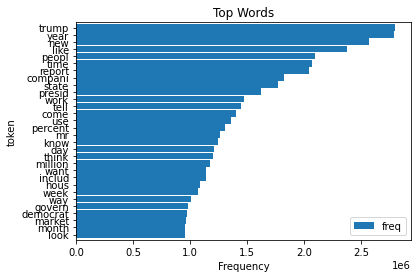

In [12]:
ax = freq_df.head(30).plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='token', title='Top Words')

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'token'),
 Text(0.5, 1.0, 'Rare Words')]

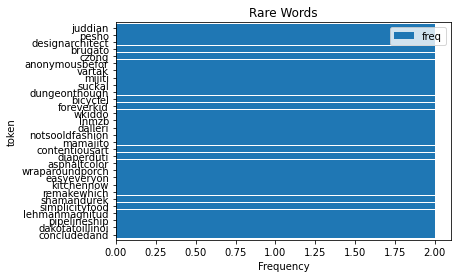

In [13]:
ax = freq_df.tail(30).plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='token', title='Rare Words')

# saving and load back as pickle

In [24]:
# test saving it and load it back
display(df_train.info())

# save to pickle file to preserve the datatype
df_train.to_pickle('train_clean_1_token.pkl')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067317 entries, 0 to 2067316
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   object 
 1   year                   int64  
 2   month                  float64
 3   day                    int64  
 4   publication            object 
 5   title_article_cleaned  object 
 6   tokens                 object 
dtypes: float64(1), int64(2), object(4)
memory usage: 110.4+ MB


None

In [ ]:
# load back
df_train_load = pd.read_pickle('train_clean_1_token.pkl')
df_train_load.shape, display(df_train_load.head(3))

In [25]:
df_train.head(3)

,date,year,month,day,publication,title_article_cleaned,tokens
0,2016-10-07 21:26:46,2016,10.000,7,Business Insider,colt gm ryan grigson andrew luck contract diff...,"[colt, gm, ryan, grigson, andrew, luck, contra..."
1,2016-01-27 00:00:00,2016,1.000,27,TMZ,pari hilton woman black uncl monti funer pari ...,"[pari, hilton, woman, black, uncl, monti, fune..."
2,2016-05-18 13:00:06,2016,5.000,18,Vox,watch googl io keynot live googl io compani bi...,"[watch, googl, io, keynot, live, googl, io, co..."


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067317 entries, 0 to 2067316
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   object 
 1   year                   int64  
 2   month                  float64
 3   day                    int64  
 4   publication            object 
 5   title_article_cleaned  object 
 6   tokens                 object 
dtypes: float64(1), int64(2), object(4)
memory usage: 110.4+ MB


# Preparing to do n-gram

In [2]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)  

In [27]:
token_words = list(df_train['tokens'])
token_words[:1]

[['colt',
  'gm',
  'ryan',
  'grigson',
  'andrew',
  'luck',
  'contract',
  'difficult',
  'build',
  'team',
  'indianapoli',
  'colt',
  'andrew',
  'luck',
  'highestpaid',
  'player',
  'nfl',
  'histori',
  'offseason',
  'fiveyear',
  'million',
  'contract',
  'million',
  'guarante',
  'howev',
  'alreadi',
  'find',
  'luck',
  'contract',
  'inhibit',
  'abil',
  'address',
  'weak',
  'roster',
  'particularli',
  'defens',
  'friday',
  'colt',
  'gm',
  'ryan',
  'grigson',
  'fire',
  'colt',
  'start',
  'difficult',
  'build',
  'team',
  'defens',
  'luck',
  'money',
  'accord',
  'keefer',
  'grigson',
  'point',
  'colt',
  'young',
  'talent',
  'hop',
  'develop',
  'defens',
  'howev',
  'blame',
  'luck',
  'contract',
  'colt',
  'weak',
  'defens',
  'th',
  'defens',
  'dvoa',
  'accur',
  'point',
  'year',
  'denver',
  'bronco',
  'pay',
  'peyton',
  'man',
  'million',
  'base',
  'salari',
  'boast',
  'elit',
  'defens',
  'luck',
  'million',
  'sa

In [23]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# bigram

In [29]:
# started at ~3:40pm at April 13th!! (done 4:06 pm)
token_words = df_train['tokens']
# Adding vocabs
# build the bigram models ...
bigram = gensim.models.Phrases(token_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# min_count ignore all words and bigrams with total collected count lower than 5 (default)
# threshold represents a threshold for forming the phrases (default is 10)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [34]:
bigram_mod.save('phrases/bigram_model')

In [4]:
bigram_mod = gensim.models.phrases.Phraser.load('phrases/bigram_model')

In [32]:
# started at ~4:07pm to next day noon
# Form Bigrams
token_words_bigrams = make_bigrams(token_words)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm", disable=['parser','ner'])
# Do lemmatization keeping only noun, adj, vb, adv
token_words_bigrams_lemm = lemmatization(token_words_bigrams, 
                                        allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

display(token_words_bigrams_lemm[:1])

[['contract',
  'difficult',
  'build',
  'team',
  'indianapoli_colt',
  'andrew',
  'luck',
  'highestpaid',
  'player',
  'nfl',
  'histori',
  'offseason',
  'fiveyear',
  'contract',
  'alreadi',
  'find',
  'luck',
  'contract',
  'inhibit',
  'abil',
  'address',
  'weak',
  'roster',
  'particularli',
  'defen',
  'fire',
  'colt',
  'start',
  'difficult',
  'build',
  'team',
  'defen',
  'luck',
  'money',
  'point',
  'colt',
  'young',
  'talent',
  'hop',
  'develop',
  'contract',
  'colt',
  'weak',
  'defen',
  'defens',
  'dvoa',
  'accur',
  'point',
  'year',
  'pay',
  'peyton',
  'man',
  'boast',
  'elit',
  'luck',
  'salari',
  'cap',
  'year',
  'man',
  'year',
  'ago',
  'come',
  'draft',
  'success',
  'colt',
  'elit',
  'team',
  'handcuff',
  'luck',
  'contract',
  'draft',
  'becom',
  'import',
  'use',
  'whatev',
  'money',
  'free',
  'agenc',
  'certainli',
  'build',
  'good',
  'colt',
  'feel',
  'pay',
  'luck',
  'high',
  'sum',
  'money',


In [35]:
token_words_bigrams_lemm[:10]

[['contract',
  'difficult',
  'build',
  'team',
  'indianapoli_colt',
  'andrew',
  'luck',
  'highestpaid',
  'player',
  'nfl',
  'histori',
  'offseason',
  'fiveyear',
  'contract',
  'alreadi',
  'find',
  'luck',
  'contract',
  'inhibit',
  'abil',
  'address',
  'weak',
  'roster',
  'particularli',
  'defen',
  'fire',
  'colt',
  'start',
  'difficult',
  'build',
  'team',
  'defen',
  'luck',
  'money',
  'point',
  'colt',
  'young',
  'talent',
  'hop',
  'develop',
  'contract',
  'colt',
  'weak',
  'defen',
  'defens',
  'dvoa',
  'accur',
  'point',
  'year',
  'pay',
  'peyton',
  'man',
  'boast',
  'elit',
  'luck',
  'salari',
  'cap',
  'year',
  'man',
  'year',
  'ago',
  'come',
  'draft',
  'success',
  'colt',
  'elit',
  'team',
  'handcuff',
  'luck',
  'contract',
  'draft',
  'becom',
  'import',
  'use',
  'whatev',
  'money',
  'free',
  'agenc',
  'certainli',
  'build',
  'good',
  'colt',
  'feel',
  'pay',
  'luck',
  'high',
  'sum',
  'money',


In [36]:
import pickle

with open("bigram_token", "wb") as fp:   #Pickling
    pickle.dump(token_words_bigrams_lemm, fp)

In [5]:
import pickle

with open("bigram_token", "rb") as fp:   # Unpickling
    token_words_bigrams_lemm = pickle.load(fp)

# trigram 

In [ ]:
# build trigram models .
trigram = gensim.models.Phrases(bigram[token_words], threshold=100)  
trigram_mod = gensim.models.phrases.Phraser(trigram) 

# See trigram example
display(trigram_mod[bigram_mod[token_words[0]]])
display(trigram_mod[bigram_mod[token_words[1]]])

In [ ]:
trigram_mod.save('phrases/trigram_model')
#trigram_mod = Phraser.load('phrases/trigram_model')

In [ ]:
# Form Trigrams
token_words_trigrams = make_trigrams(token_words)
token_words_trigrams_lemm = lemmatization(token_words_trigrams, 
                                        allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
display(token_words_trigrams_lemm[:1])

In [ ]:
import pickle

#with open("trigram_token", "wb") as fp:   #Pickling
#    pickle.dump(token_words_trigrams_lemm, fp)

with open("trigram_token", "rb") as fp:   # Unpickling
    token_words_trigrams_lemm = pickle.load(fp)

In [37]:
# create a dictionary containing the number of times a word appears in the training dataset
id2word = gensim.corpora.Dictionary(token_words_bigrams_lemm) # change from trigrams to bigrams
print(type(id2word))

count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

<class 'gensim.corpora.dictionary.Dictionary'>
0 abil
1 accur
2 address
3 agenc
4 ago
5 alreadi
6 andrew
7 becom
8 boast
9 build
10 cap


In [38]:
# filter out tokens that appear in < 100 documents or more than 0.5 documents (fraction of total corpus size), or
# after the above two steps, keep only the first 100,000 most frequent tokens????
# id2word.filter_extremes(no_below=100, no_above=0.5, keep_n=20000) 
id2word.filter_extremes(no_below=100, no_above=0.5, keep_n=20000)
# filter out tokens that appears more than 50% of the document

In [39]:
# after filter, create corpus
texts = token_words_bigrams_lemm  #token_words_trigrams_lemm

# create term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [40]:
texts[0:10]

[['contract',
  'difficult',
  'build',
  'team',
  'indianapoli_colt',
  'andrew',
  'luck',
  'highestpaid',
  'player',
  'nfl',
  'histori',
  'offseason',
  'fiveyear',
  'contract',
  'alreadi',
  'find',
  'luck',
  'contract',
  'inhibit',
  'abil',
  'address',
  'weak',
  'roster',
  'particularli',
  'defen',
  'fire',
  'colt',
  'start',
  'difficult',
  'build',
  'team',
  'defen',
  'luck',
  'money',
  'point',
  'colt',
  'young',
  'talent',
  'hop',
  'develop',
  'contract',
  'colt',
  'weak',
  'defen',
  'defens',
  'dvoa',
  'accur',
  'point',
  'year',
  'pay',
  'peyton',
  'man',
  'boast',
  'elit',
  'luck',
  'salari',
  'cap',
  'year',
  'man',
  'year',
  'ago',
  'come',
  'draft',
  'success',
  'colt',
  'elit',
  'team',
  'handcuff',
  'luck',
  'contract',
  'draft',
  'becom',
  'import',
  'use',
  'whatev',
  'money',
  'free',
  'agenc',
  'certainli',
  'build',
  'good',
  'colt',
  'feel',
  'pay',
  'luck',
  'high',
  'sum',
  'money',


In [41]:
# investigat the tokens
corpus[:1], corpus[4310]

([[(0, 1),
   (1, 1),
   (2, 1),
   (3, 1),
   (4, 1),
   (5, 1),
   (6, 1),
   (7, 1),
   (8, 1),
   (9, 3),
   (10, 1),
   (11, 1),
   (12, 5),
   (13, 1),
   (14, 5),
   (15, 3),
   (16, 1),
   (17, 1),
   (18, 3),
   (19, 2),
   (20, 2),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 1),
   (28, 1),
   (29, 1),
   (30, 2),
   (31, 1),
   (32, 1),
   (33, 1),
   (34, 1),
   (35, 1),
   (36, 6),
   (37, 2),
   (38, 3),
   (39, 2),
   (40, 1),
   (41, 1),
   (42, 1),
   (43, 2),
   (44, 1),
   (45, 1),
   (46, 2),
   (47, 2),
   (48, 1),
   (49, 1),
   (50, 1),
   (51, 1),
   (52, 1),
   (53, 1),
   (54, 1),
   (55, 4),
   (56, 1),
   (57, 2),
   (58, 1),
   (59, 3),
   (60, 1)]],
 [(5, 1),
  (17, 1),
  (56, 2),
  (59, 1),
  (81, 2),
  (83, 1),
  (84, 1),
  (86, 1),
  (88, 2),
  (93, 2),
  (105, 1),
  (109, 2),
  (110, 1),
  (116, 4),
  (118, 1),
  (119, 1),
  (130, 1),
  (136, 1),
  (159, 1),
  (184, 2),
  (221, 1),
  (273, 1),
  (279, 1),
  (301, 1),

In [42]:
bow_doc_4310 = corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
            id2word[bow_doc_4310[i][0]], bow_doc_4310[i][1]))

Word 5 ("alreadi") appears 1 time.
Word 17 ("develop") appears 1 time.
Word 56 ("use") appears 2 time.
Word 59 ("year") appears 1 time.
Word 81 ("appear") appears 2 time.
Word 83 ("big") appears 1 time.
Word 84 ("cardboard") appears 1 time.
Word 86 ("confer") appears 1 time.
Word 88 ("devic") appears 2 time.
Word 93 ("insid") appears 2 time.
Word 105 ("origin") appears 1 time.
Word 109 ("realiti") appears 2 time.
Word 110 ("recodenet") appears 1 time.
Word 116 ("virtual") appears 4 time.
Word 118 ("watch") appears 1 time.
Word 119 ("week") appears 1 time.
Word 130 ("camera") appears 1 time.
Word 136 ("close") appears 1 time.
Word 159 ("experi") appears 1 time.
Word 184 ("hold") appears 2 time.
Word 221 ("place") appears 1 time.
Word 273 ("unit") appears 1 time.
Word 279 ("way") appears 1 time.
Word 301 ("begin") appears 1 time.
Word 303 ("bring") appears 1 time.
Word 312 ("clear") appears 1 time.
Word 360 ("late") appears 2 time.
Word 361 ("later") appears 1 time.
Word 374 ("need") app

In [43]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abil', 1),
  ('accur', 1),
  ('address', 1),
  ('agenc', 1),
  ('ago', 1),
  ('alreadi', 1),
  ('andrew', 1),
  ('becom', 1),
  ('boast', 1),
  ('build', 3),
  ('cap', 1),
  ('certainli', 1),
  ('colt', 5),
  ('come', 1),
  ('contract', 5),
  ('defen', 3),
  ('defens', 1),
  ('develop', 1),
  ('difficult', 3),
  ('draft', 2),
  ('elit', 2),
  ('feel', 1),
  ('final', 1),
  ('find', 1),
  ('fire', 1),
  ('fiveyear', 1),
  ('free', 1),
  ('good', 1),
  ('handcuff', 1),
  ('high', 1),
  ('highestpaid', 2),
  ('histori', 1),
  ('hop', 1),
  ('import', 1),
  ('indianapoli_colt', 1),
  ('inhibit', 1),
  ('luck', 6),
  ('man', 2),
  ('money', 3),
  ('nfl', 2),
  ('number', 1),
  ('offseason', 1),
  ('particularli', 1),
  ('pay', 2),
  ('perhap', 1),
  ('peyton', 1),
  ('player', 2),
  ('point', 2),
  ('reconsid', 1),
  ('roster', 1),
  ('salari', 1),
  ('start', 1),
  ('success', 1),
  ('sum', 1),
  ('talent', 1),
  ('team', 4),
  ('use', 1),
  ('weak', 2),
  ('whatev', 1),
  ('year', 3),

In [44]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

[[('abil', 1),
  ('accur', 1),
  ('address', 1),
  ('agenc', 1),
  ('ago', 1),
  ('alreadi', 1),
  ('andrew', 1),
  ('becom', 1),
  ('boast', 1),
  ('build', 3),
  ('cap', 1),
  ('certainli', 1),
  ('colt', 5),
  ('come', 1),
  ('contract', 5),
  ('defen', 3),
  ('defens', 1),
  ('develop', 1),
  ('difficult', 3),
  ('draft', 2),
  ('elit', 2),
  ('feel', 1),
  ('final', 1),
  ('find', 1),
  ('fire', 1),
  ('fiveyear', 1),
  ('free', 1),
  ('good', 1),
  ('handcuff', 1),
  ('high', 1),
  ('highestpaid', 2),
  ('histori', 1),
  ('hop', 1),
  ('import', 1),
  ('indianapoli_colt', 1),
  ('inhibit', 1),
  ('luck', 6),
  ('man', 2),
  ('money', 3),
  ('nfl', 2),
  ('number', 1),
  ('offseason', 1),
  ('particularli', 1),
  ('pay', 2),
  ('perhap', 1),
  ('peyton', 1),
  ('player', 2),
  ('point', 2),
  ('reconsid', 1),
  ('roster', 1),
  ('salari', 1),
  ('start', 1),
  ('success', 1),
  ('sum', 1),
  ('talent', 1),
  ('team', 4),
  ('use', 1),
  ('weak', 2),
  ('whatev', 1),
  ('year', 3),

In [6]:
DICT_PATH="lda_models/id2word_2grams"
CORPUS_PATH="lda_models/corpu_2grams"

In [ ]:
id2word.save(DICT_PATH)
corpora.MmCorpus.serialize(CORPUS_PATH, corpus)

In [7]:
loaded_dict = corpora.Dictionary.load(DICT_PATH)
loaded_corp = corpora.MmCorpus(CORPUS_PATH)

# Repeat the same for test dataset

In [ ]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = id2word.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

In [12]:
# preparing test dataset
df_test = pd.read_csv('data_set1_test.csv')
df_test.shape, display(df_test.head(3))

,date,year,month,day,title,article,publication
0,2016-09-21,2016,9.000,21,"After split, London's Madame Tussauds separate...",LONDON (Reuters) - London’s Madame Tussauds mu...,Reuters
1,2016-10-10 11:10:04,2016,10.000,10,Holiday Cooking,What to Cook Sam Sifton emails readers of Cook...,The New York Times
2,2016-09-21 14:10:00,2016,9.000,21,Tiffany Trump Wears Pretty Bridesmaid Dress at...,There’s so much news to keep up with regarding...,People


((516831, 7), None)

In [13]:
df_test['title_article'] = df_test['title'] + " " + df_test['article']
df_test.drop(columns=['title','article'], inplace=True)

In [14]:
df_test = preprocessing_1(df_test, 'title_article')
df_test.shape, display(df_test.head(3))

Step1
Step2
Step3
Step4
Step5


/var/folders/2k/10y4y74x37sf_w_dp4gg_p5w0000gn/T/ipykernel_719/3817499844.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_col] = df[new_col].str.replace(r'\d+','')


Step7


/var/folders/2k/10y4y74x37sf_w_dp4gg_p5w0000gn/T/ipykernel_719/3817499844.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_col] = df[new_col].str.replace('[^\w\s]','')


Step8
Step9
Step10
Step12
Step13
Step14
Step15


,date,year,month,day,publication,title_article,title_article_cleaned
0,2016-09-21,2016,9.000,21,Reuters,"After split, London's Madame Tussauds separate...",split london madam tussaud separ joli pitt wax...
1,2016-10-10 11:10:04,2016,10.000,10,The New York Times,Holiday Cooking What to Cook Sam Sifton emails...,holiday cook cook sam sifton email reader cook...
2,2016-09-21 14:10:00,2016,9.000,21,People,Tiffany Trump Wears Pretty Bridesmaid Dress at...,tiffani trump wear pretti bridesmaid dress aun...


((516831, 7), None)

In [15]:
df_test.isna().sum()

date                     0
year                     0
month                    0
day                      0
publication              0
title_article            0
title_article_cleaned    0
dtype: int64

In [16]:
df_test.drop(columns=['title_article'], inplace=True)
df_test.to_csv('data_set1_test.clean_1.csv', index=False)

In [ ]:
df_test = pd.read_csv('data_set1_test.clean_1.csv')

In [17]:
test_texts = df_test['title_article_cleaned'].str.split().copy()
token_words = test_texts # df_train['tokens']

In [18]:
len(token_words)

516831

In [19]:
token_words[0]

['split',
 'london',
 'madam',
 'tussaud',
 'separ',
 'joli',
 'pitt',
 'wax',
 'figur',
 'london',
 'reuter',
 'london',
 'madam',
 'tussaud',
 'museum',
 'say',
 'wednesday',
 'separ',
 'wax',
 'figur',
 'replica',
 'angelina',
 'joli',
 'brad',
 'pitt',
 'hollywood',
 'power',
 'coupl',
 'announc',
 'split',
 'joli',
 'attorney',
 'say',
 'tuesday',
 'actress',
 'file',
 'divorc',
 'pitt',
 'romant',
 'partner',
 'husband',
 'year',
 'react',
 'quickli',
 'yesterday',
 'news',
 'separ',
 'angelina',
 'joli',
 'brad',
 'pitt',
 'plan',
 'divorc',
 'mirror',
 'separ',
 'attract',
 'madam',
 'tussaud',
 'spokesperson',
 'say',
 'coupl',
 'wax',
 'figur',
 'launch',
 'split',
 'featur',
 'respect',
 'distanc',
 'angelina',
 'keep',
 'nicol',
 'kidman',
 'compani',
 'brad',
 'pitt',
 'time',
 'costar',
 'morgan',
 'freeman',
 'report',
 'marielouis',
 'gumuchian']

In [21]:
df_test.head(1)

,date,year,month,day,publication,title_article_cleaned
0,2016-09-21,2016,9.000,21,Reuters,split london madam tussaud separ joli pitt wax...


In [25]:
import spacy
token_words_bigrams = make_bigrams(token_words)
nlp = spacy.load("en_core_web_sm", disable=['parser','ner'])
token_words_bigrams_lemm = lemmatization(token_words_bigrams, 
                                        allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [26]:
import pickle

with open("bigram_token_test", "wb") as fp:   #Pickling
    pickle.dump(token_words_bigrams_lemm, fp)